<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/tempdelta_actual_summer_scatter_NO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install energyquantified

     |████████████████████████████████| 76 kB 1.6 MB/s 
     |████████████████████████████████| 61 kB 1.3 MB/s 
     |████████████████████████████████| 227 kB 39.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
from datetime import timedelta, date
from energyquantified import EnergyQuantified
from energyquantified.time import Frequency
from energyquantified.metadata import Aggregation
from datetime import datetime as dtdatetime
from energyquantified.time import (
   Resolution, Frequency, UTC, get_datetime
)
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
api_key = 'ea1244-4926fe-571bed-d0f4b5'
EQ = EnergyQuantified(api_key=api_key)

In [6]:
from datetime import datetime, time
from energyquantified.time import Frequency


In [7]:
day_ahead_zero = EQ.timeseries.load(
   'NO3 Consumption Temperature °C H Actual',
   begin='2020-06-01',
   end='2020-08-31',
   #frequency=Frequency.PT1H
)
day_ahead_zero = day_ahead_zero.to_dataframe()

In [8]:
day_ahead_zero

,NO3 Consumption Temperature °C H Actual
,
,
date,
2020-06-01 00:00:00+02:00,11.74
2020-06-01 01:00:00+02:00,11.49
2020-06-01 02:00:00+02:00,11.12
2020-06-01 03:00:00+02:00,10.79
2020-06-01 04:00:00+02:00,11.01
...,...
2020-08-30 19:00:00+02:00,11.01


In [9]:
day_ahead_forecast_twelve = EQ.instances.relative(
   'NO3 Consumption Temperature °C 15min Forecast',
   begin=dtdatetime(2020, 6, 1, 0, 0, 0),
   end=dtdatetime(2020, 8, 31, 0, 0, 0),
   tag='arome',
   days_ahead = 1,  # The day-ahead forecast (0 or higher allowed)
   time_of_day = time(12, 0),  # Issued at exactly 12:00
  #  issued ='earliest',
   frequency = Frequency.PT1H
)
day_ahead_twelve=day_ahead_forecast_twelve.to_dataframe()

In [10]:
day_ahead_twelve

,NO3 Consumption Temperature °C 15min Forecast
,
,
date,
2020-06-01 00:00:00+02:00,12.23
2020-06-01 01:00:00+02:00,11.71
2020-06-01 02:00:00+02:00,11.31
2020-06-01 03:00:00+02:00,11.16
2020-06-01 04:00:00+02:00,11.35
...,...
2020-08-30 19:00:00+02:00,10.36


In [11]:
df_comb = pd.merge(day_ahead_zero, day_ahead_twelve, left_index=True, right_index=True, how='inner')
df_comb

,NO3 Consumption Temperature °C H Actual,NO3 Consumption Temperature °C 15min Forecast
,,
,,
date,,
2020-06-01 00:00:00+02:00,11.74,12.23
2020-06-01 01:00:00+02:00,11.49,11.71
2020-06-01 02:00:00+02:00,11.12,11.31
2020-06-01 03:00:00+02:00,10.79,11.16
2020-06-01 04:00:00+02:00,11.01,11.35
...,...,...
2020-08-30 19:00:00+02:00,11.01,10.36


In [12]:
df_comb.columns

MultiIndex([(      'NO3 Consumption Temperature °C H Actual', '', ''),
            ('NO3 Consumption Temperature °C 15min Forecast', '', '')],
           )

In [13]:
df_comb['Temp Delta', '', '']= df_comb['NO3 Consumption Temperature °C H Actual',''] - df_comb['NO3 Consumption Temperature °C 15min Forecast','']

/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [14]:
df_comb

,NO3 Consumption Temperature °C H Actual,NO3 Consumption Temperature °C 15min Forecast,Temp Delta
,,,
,,,
date,,,
2020-06-01 00:00:00+02:00,11.74,12.23,-0.49
2020-06-01 01:00:00+02:00,11.49,11.71,-0.22
2020-06-01 02:00:00+02:00,11.12,11.31,-0.19
2020-06-01 03:00:00+02:00,10.79,11.16,-0.37
2020-06-01 04:00:00+02:00,11.01,11.35,-0.34
...,...,...,...
2020-08-30 19:00:00+02:00,11.01,10.36,0.65


In [15]:
df_comb.columns

MultiIndex([(      'NO3 Consumption Temperature °C H Actual', '', ''),
            ('NO3 Consumption Temperature °C 15min Forecast', '', ''),
            (                                   'Temp Delta', '', '')],
           )

In [16]:
df_comb.drop(['NO3 Consumption Temperature °C H Actual', 'NO3 Consumption Temperature °C 15min Forecast'], axis=1, level=0 ,inplace=True)
df_comb

,Temp Delta
,
,
date,
2020-06-01 00:00:00+02:00,-0.49
2020-06-01 01:00:00+02:00,-0.22
2020-06-01 02:00:00+02:00,-0.19
2020-06-01 03:00:00+02:00,-0.37
2020-06-01 04:00:00+02:00,-0.34
...,...
2020-08-30 19:00:00+02:00,0.65


In [17]:
df_comb.columns = ['_'.join(col) for col in df_comb.columns.values]

In [18]:
df_comb

,Temp Delta__
date,
2020-06-01 00:00:00+02:00,-0.49
2020-06-01 01:00:00+02:00,-0.22
2020-06-01 02:00:00+02:00,-0.19
2020-06-01 03:00:00+02:00,-0.37
2020-06-01 04:00:00+02:00,-0.34
...,...
2020-08-30 19:00:00+02:00,0.65
2020-08-30 20:00:00+02:00,0.31
2020-08-30 21:00:00+02:00,-0.09


In [19]:
df_comb.columns

Index(['Temp Delta__'], dtype='object')

In [20]:
spot=(pd.read_csv('/content/drive/My Drive/dataset/market_prices_euro_updated.csv', index_col = ["time"], parse_dates=True).loc[:,"NO3_spot"])
imbalance = (pd.read_csv('/content/drive/My Drive/dataset/market_prices_euro_updated.csv', index_col = ["time"], parse_dates=True).loc[:,"NO3_imbalance"])

In [21]:
spot=spot.to_frame()
imbalance= imbalance.to_frame()

In [22]:
spot

,NO3_spot
time,
2018-02-01 00:00:00,0.02552
2018-02-01 01:00:00,0.02558
2018-02-01 02:00:00,0.02553
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02684
...,...
2021-04-22 08:00:00,0.02250
2021-04-22 09:00:00,0.02240
2021-04-22 10:00:00,0.02204


In [23]:
imbalance

,NO3_imbalance
time,
2018-02-01 00:00:00,0.00300
2018-02-01 01:00:00,0.00300
2018-02-01 02:00:00,0.00300
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02334
...,...
2021-04-22 08:00:00,0.02250
2021-04-22 09:00:00,0.02240
2021-04-22 10:00:00,0.03157


In [24]:
imbalance.tz_localize(None)

,NO3_imbalance
time,
2018-02-01 00:00:00,0.00300
2018-02-01 01:00:00,0.00300
2018-02-01 02:00:00,0.00300
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02334
...,...
2021-04-22 08:00:00,0.02250
2021-04-22 09:00:00,0.02240
2021-04-22 10:00:00,0.03157


In [25]:
imbalance.index = pd.to_datetime(imbalance.index, utc=True).tz_convert('Europe/Stockholm')

In [26]:
imbalance

,NO3_imbalance
time,
2018-02-01 01:00:00+01:00,0.00300
2018-02-01 02:00:00+01:00,0.00300
2018-02-01 03:00:00+01:00,0.00300
2018-02-01 04:00:00+01:00,0.02573
2018-02-01 05:00:00+01:00,0.02334
...,...
2021-04-22 10:00:00+02:00,0.02250
2021-04-22 11:00:00+02:00,0.02240
2021-04-22 12:00:00+02:00,0.03157


In [27]:
spot.tz_localize(None)

,NO3_spot
time,
2018-02-01 00:00:00,0.02552
2018-02-01 01:00:00,0.02558
2018-02-01 02:00:00,0.02553
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02684
...,...
2021-04-22 08:00:00,0.02250
2021-04-22 09:00:00,0.02240
2021-04-22 10:00:00,0.02204


In [28]:
spot.index = pd.to_datetime(spot.index, utc=True).tz_convert('Europe/Stockholm')

In [29]:
spot

,NO3_spot
time,
2018-02-01 01:00:00+01:00,0.02552
2018-02-01 02:00:00+01:00,0.02558
2018-02-01 03:00:00+01:00,0.02553
2018-02-01 04:00:00+01:00,0.02573
2018-02-01 05:00:00+01:00,0.02684
...,...
2021-04-22 10:00:00+02:00,0.02250
2021-04-22 11:00:00+02:00,0.02240
2021-04-22 12:00:00+02:00,0.02204


In [30]:
df_comb.tz_convert(None)

,Temp Delta__
date,
2020-05-31 22:00:00,-0.49
2020-05-31 23:00:00,-0.22
2020-06-01 00:00:00,-0.19
2020-06-01 01:00:00,-0.37
2020-06-01 02:00:00,-0.34
...,...
2020-08-30 17:00:00,0.65
2020-08-30 18:00:00,0.31
2020-08-30 19:00:00,-0.09


In [31]:
df_comb.index = pd.to_datetime(df_comb.index, utc=True).tz_convert('Europe/Stockholm')

In [32]:
df_comb

,Temp Delta__
date,
2020-06-01 00:00:00+02:00,-0.49
2020-06-01 01:00:00+02:00,-0.22
2020-06-01 02:00:00+02:00,-0.19
2020-06-01 03:00:00+02:00,-0.37
2020-06-01 04:00:00+02:00,-0.34
...,...
2020-08-30 19:00:00+02:00,0.65
2020-08-30 20:00:00+02:00,0.31
2020-08-30 21:00:00+02:00,-0.09


In [33]:
df_plot = pd.merge(df_comb, spot , left_index=True, right_index=True, how='inner')
df_plot

,Temp Delta__,NO3_spot
2020-06-01 00:00:00+02:00,-0.49,0.00454
2020-06-01 01:00:00+02:00,-0.22,0.00416
2020-06-01 02:00:00+02:00,-0.19,0.02650
2020-06-01 03:00:00+02:00,-0.37,0.02701
2020-06-01 04:00:00+02:00,-0.34,0.02706
...,...,...
2020-08-30 19:00:00+02:00,0.65,0.01578
2020-08-30 20:00:00+02:00,0.31,0.01588
2020-08-30 21:00:00+02:00,-0.09,0.01597
2020-08-30 22:00:00+02:00,-0.21,0.01585


In [34]:
df_plot = pd.merge(df_plot, imbalance, left_index=True, right_index=True, how='inner')
df_plot

,Temp Delta__,NO3_spot,NO3_imbalance
2020-06-01 00:00:00+02:00,-0.49,0.00454,0.01200
2020-06-01 01:00:00+02:00,-0.22,0.00416,0.00667
2020-06-01 02:00:00+02:00,-0.19,0.02650,0.02650
2020-06-01 03:00:00+02:00,-0.37,0.02701,0.02500
2020-06-01 04:00:00+02:00,-0.34,0.02706,0.02400
...,...,...,...
2020-08-30 19:00:00+02:00,0.65,0.01578,0.01578
2020-08-30 20:00:00+02:00,0.31,0.01588,0.01588
2020-08-30 21:00:00+02:00,-0.09,0.01597,0.01597
2020-08-30 22:00:00+02:00,-0.21,0.01585,0.01585


In [35]:
df_plot.columns

Index(['Temp Delta__', 'NO3_spot', 'NO3_imbalance'], dtype='object')

In [36]:
df_plot['Direction']= df_plot['NO3_spot']-df_plot['NO3_imbalance']

In [37]:
df_plot

,Temp Delta__,NO3_spot,NO3_imbalance,Direction
2020-06-01 00:00:00+02:00,-0.49,0.00454,0.01200,-0.00746
2020-06-01 01:00:00+02:00,-0.22,0.00416,0.00667,-0.00251
2020-06-01 02:00:00+02:00,-0.19,0.02650,0.02650,0.00000
2020-06-01 03:00:00+02:00,-0.37,0.02701,0.02500,0.00201
2020-06-01 04:00:00+02:00,-0.34,0.02706,0.02400,0.00306
...,...,...,...,...
2020-08-30 19:00:00+02:00,0.65,0.01578,0.01578,0.00000
2020-08-30 20:00:00+02:00,0.31,0.01588,0.01588,0.00000
2020-08-30 21:00:00+02:00,-0.09,0.01597,0.01597,0.00000
2020-08-30 22:00:00+02:00,-0.21,0.01585,0.01585,0.00000


In [38]:
df_plot.drop(['NO3_spot', 'NO3_imbalance'], axis=1, inplace=True)

In [39]:
df_plot.index.name="Date"

In [40]:
df_plot

,Temp Delta__,Direction
Date,,
2020-06-01 00:00:00+02:00,-0.49,-0.00746
2020-06-01 01:00:00+02:00,-0.22,-0.00251
2020-06-01 02:00:00+02:00,-0.19,0.00000
2020-06-01 03:00:00+02:00,-0.37,0.00201
2020-06-01 04:00:00+02:00,-0.34,0.00306
...,...,...
2020-08-30 19:00:00+02:00,0.65,0.00000
2020-08-30 20:00:00+02:00,0.31,0.00000
2020-08-30 21:00:00+02:00,-0.09,0.00000


In [41]:
df_plot.columns

Index(['Temp Delta__', 'Direction'], dtype='object')

In [42]:
df_plot['Direction'] = df_plot['Direction'].apply(lambda x: x*1000)

In [43]:
df_plot

,Temp Delta__,Direction
Date,,
2020-06-01 00:00:00+02:00,-0.49,-7.46
2020-06-01 01:00:00+02:00,-0.22,-2.51
2020-06-01 02:00:00+02:00,-0.19,0.00
2020-06-01 03:00:00+02:00,-0.37,2.01
2020-06-01 04:00:00+02:00,-0.34,3.06
...,...,...
2020-08-30 19:00:00+02:00,0.65,0.00
2020-08-30 20:00:00+02:00,0.31,0.00
2020-08-30 21:00:00+02:00,-0.09,0.00


In [44]:
df_plot.columns

Index(['Temp Delta__', 'Direction'], dtype='object')

In [45]:
df_plot['Temp Delta__'].astype('float64')

Date
2020-06-01 00:00:00+02:00   -0.49
2020-06-01 01:00:00+02:00   -0.22
2020-06-01 02:00:00+02:00   -0.19
2020-06-01 03:00:00+02:00   -0.37
2020-06-01 04:00:00+02:00   -0.34
                             ... 
2020-08-30 19:00:00+02:00    0.65
2020-08-30 20:00:00+02:00    0.31
2020-08-30 21:00:00+02:00   -0.09
2020-08-30 22:00:00+02:00   -0.21
2020-08-30 23:00:00+02:00   -0.40
Name: Temp Delta__, Length: 2078, dtype: float64

In [46]:
df_plot['Direction'].astype('float64')

Date
2020-06-01 00:00:00+02:00   -7.46
2020-06-01 01:00:00+02:00   -2.51
2020-06-01 02:00:00+02:00    0.00
2020-06-01 03:00:00+02:00    2.01
2020-06-01 04:00:00+02:00    3.06
                             ... 
2020-08-30 19:00:00+02:00    0.00
2020-08-30 20:00:00+02:00    0.00
2020-08-30 21:00:00+02:00    0.00
2020-08-30 22:00:00+02:00    0.00
2020-08-30 23:00:00+02:00    0.00
Name: Direction, Length: 2078, dtype: float64

In [47]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]

In [48]:
# fig, ax1 = plt.subplots(figsize=[20,7])

# x = df_plot.index
# plt.xlabel("Timestamp")
# plt.ylabel("Temp Delta", fontsize=12, color=red);
# y1 = df_plot['Temp Delta__']
# y2 = df_plot['Direction']

# ax2 = ax1.twinx()

# ax1.scatter(x, y1, alpha=0.6, lw=4, color=red)
# plt.ylabel("Direction of Market", fontsize=12, color=blue);
# ax2.scatter(x, y2, alpha=0.6, lw=4, color=blue)
# ax1.invert_yaxis()
# ax2.invert_yaxis()
# plt.autoscale();

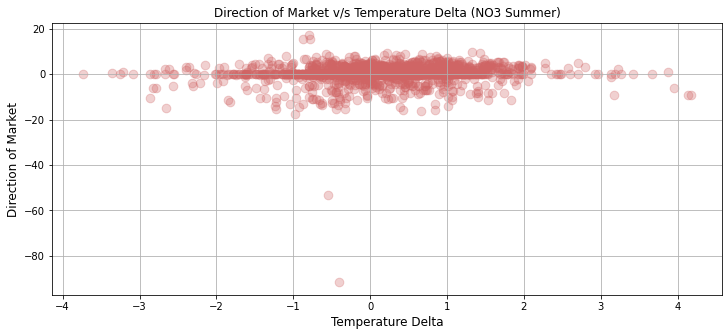

In [49]:
fig= plt.figure(figsize=[12,5])
plt.scatter(x=df_plot['Temp Delta__'],
            y=df_plot['Direction'],
            alpha=0.3,
            s=75,
            color=red);
plt.grid()
plt.xlabel("Temperature Delta", fontsize=12),
plt.ylabel("Direction of Market", fontsize=12);
plt.title("Direction of Market v/s Temperature Delta (NO3 Summer)");
plt.autoscale();